# Part 1

In [1]:
import numpy as np
import pydicom as dicom
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image

## Section آ

In [2]:
# read file
dc = dicom.dcmread("./file1.dcm")

## Section ب

In [3]:
dc.Modality

'CT'

In [4]:
# answer:
print(dc[("0028", "0100")])
print(dc[("0028", "0101")])
print(dc[("0018", "0015")])
# print(dc[("0008", "0016")])

(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored                         US: 12
(0018, 0015) Body Part Examined                  CS: 'CHEST'


## Section ج

### Actual Image

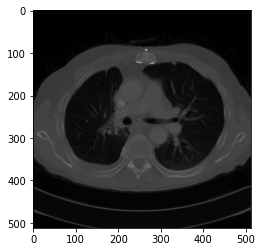

In [5]:
image = dc.pixel_array
plt.imshow(image, cmap = "gray")
plt.show()

### Downsample Image (X)

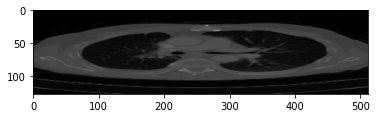

In [6]:
downsample_image_x = image[::4, :]
plt.imshow(downsample_image_x, cmap="gray")
plt.show()

### Downsample Image (Y)

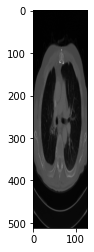

In [7]:
downsample_image_y = image[:, ::4]
plt.imshow(downsample_image_y, cmap="gray")
plt.show()

### quarter downsampling image

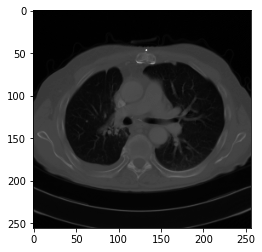

In [8]:
downsample_image_quarter = image[::2, ::2]
plt.imshow(downsample_image_quarter, cmap = "gray")
plt.show()

## Section د

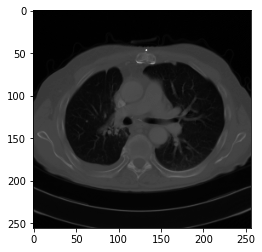

In [9]:
downsample_image_half = image[::2, ::2]
plt.imshow(downsample_image_half, cmap = "gray")
plt.show()

## Section ه

<div style="text-align: right">از دیدگاه حجم پیکسل از دست رفته داریم که در تصاویر که فقط در یک جهت(یک چهارم) نمونه کاهی شدن و تصویر که در دو جهت(نصف) نمونه کاهی شده داریم حجم برابری از دست رفته و در تصویری کخ در دو جهت یک چهارم شده حجم بیشتری از دست رفته است.</div>

<div style="text-align: right">از جهت اطلاعات از دست رفته در حالت عمودی تصویر : اصلی = یک چهارم شده افقی بعد نصف شده در دوجهت و در آخر یک چهارم شده عمودی = یک چهارم شده در دو جهت</div>

<div style="text-align: right">از جهت اطلاعات از دست رفته در حالت عمودی تصویر : اصلی = یک چهارم شده عمودی بعد نصف شده در دوجهت و در آخر یک چهارم شده افقی = یک چهارم شده در دو جهت</div>

<div style="text-align: right"> از دید گویایی تصویر برای انسان به نظر تصاویر مربعی بهتر ار تصاویر مستطیلی است </div>

<div style="text-align: right"> در تصویر اصلی نقاط ریزی هستن که در تصویر یک چهارم شده و نصف شده مشخص نیست </div>

## Section و

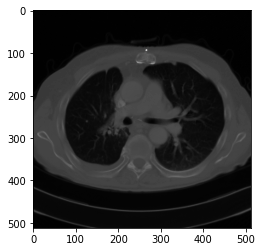

In [10]:
near_image = cv.resize(downsample_image_half, (512, 512), 0, 0, interpolation=cv.INTER_NEAREST)
plt.imshow(near_image, cmap = "gray")
plt.show()

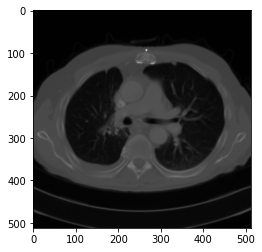

In [11]:
linear_image = cv.resize(downsample_image_half, (512, 512), 0, 0, interpolation=cv.INTER_LINEAR)
plt.imshow(linear_image, cmap = "gray")
plt.show()

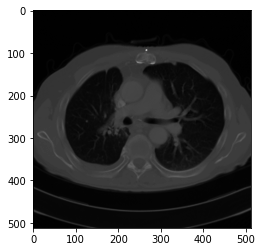

In [12]:
cubic_image = cv.resize(downsample_image_half, (512, 512), 0, 0, interpolation=cv.INTER_CUBIC)
plt.imshow(cubic_image, cmap = "gray")
plt.show()

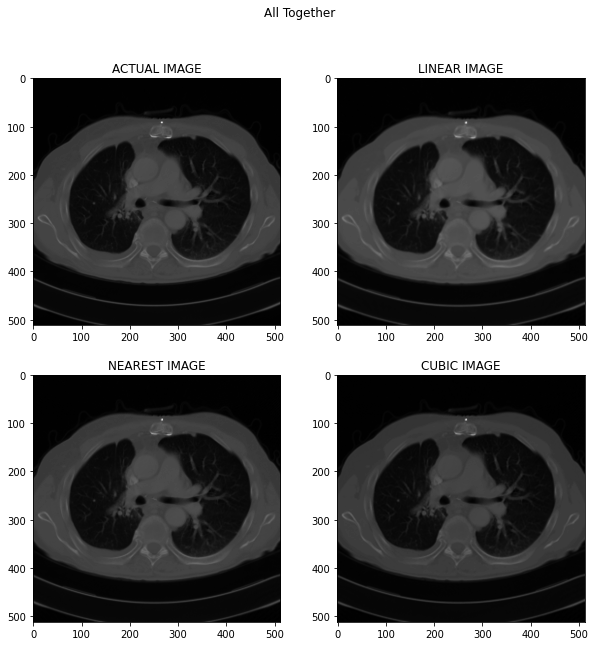

In [13]:
# Show together
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(image, cmap = "gray")
ax[0, 0].set_title("ACTUAL IMAGE")
ax[0, 1].imshow(linear_image, cmap = "gray")
ax[0, 1].set_title("LINEAR IMAGE")
ax[1, 0].imshow(near_image, cmap = "gray")
ax[1, 0].set_title("NEAREST IMAGE")
ax[1, 1].imshow(cubic_image, cmap = "gray")
ax[1, 1].set_title("CUBIC IMAGE")
fig.suptitle("All Together")
plt.show()

In [14]:
def diff(img1, img2, method):
    diff_img = np.subtract(img1, img2, dtype=np.int16)
    diff_img = np.abs(diff_img)
    diff_img = diff_img / np.max(diff_img)
    if method == "SE": # Squared Error
        return np.sqrt(diff_img)
    if method == "AE": # Absolute Error
        return diff_img

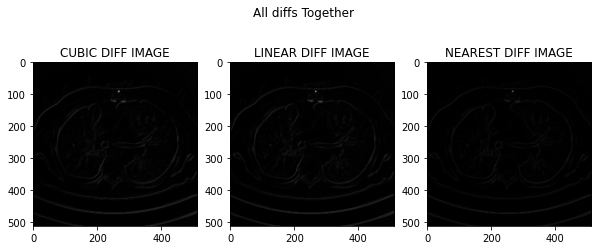

In [15]:
# Show diffs together
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].imshow(diff(cubic_image, image, 'AE'), cmap = "gray")
ax[0].set_title("CUBIC DIFF IMAGE")
ax[1].imshow(diff(linear_image, image, 'AE'),cmap = "gray")
ax[1].set_title("LINEAR DIFF IMAGE")
ax[2].imshow(diff(near_image, image, 'AE'), cmap = "gray")
ax[2].set_title("NEAREST DIFF IMAGE")
fig.suptitle("All diffs Together")
plt.show()

In [16]:
# Errors:
print("                   MSE    MAE")
print(f"nearest neighbor: {np.mean(diff(near_image, image, 'SE')):.5f} {np.mean(diff(near_image, image, 'AE')):.5f}")
print(f"bilinear        : {np.mean(diff(linear_image, image, 'SE')):.5f} {np.mean(diff(linear_image, image, 'AE')):.5f}")
print(f"bicubic         : {np.mean(diff(cubic_image, image, 'SE')):.5f} {np.mean(diff(cubic_image, image, 'AE')):.5f}")

                   MSE    MAE
nearest neighbor: 0.06077 0.00811
bilinear        : 0.08734 0.01243
bicubic         : 0.08868 0.01261


<div style="text-align: right">در تصاویر اختلاف هم مشهود است nearest neighbor > bilinear > bicubic :طبق میانگین مربعات خطا و میانگین قدر مطلق خطا داریم که</div>

## Section ز

In [17]:
# Saving the image

# save file1.bmp in ./saves/part1/file1.bmp
cv.imwrite("./saves/part1/file1.bmp", image.astype(np.uint8))

# save file1.tif in ./saves/part1/file1.tif
cv.imwrite("./saves/part1/file1.tif", image.astype(np.uint8))

True